In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, layers
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score

In [2]:
import os
os.system('mkdir -p images')

0

## Importing the dataset

In [3]:
name = 'benzene_old_dft'
mol = 'Benzene'
path_to_dataset = '../../datasets'

In [4]:
data = np.load("{}/{}.npz".format(path_to_dataset, name))

In [5]:
configs = data['R']
COM = configs.mean(axis = 1, keepdims = True)

In [6]:
configs.shape, data.files, data['z']
# for i in data.files:
#     print(i)
#     print(data[i])


((627983, 12, 3),
 ['E', 'name', 'F', 'theory', 'R', 'z', 'type', 'md5'],
 array([6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1], dtype=uint8))

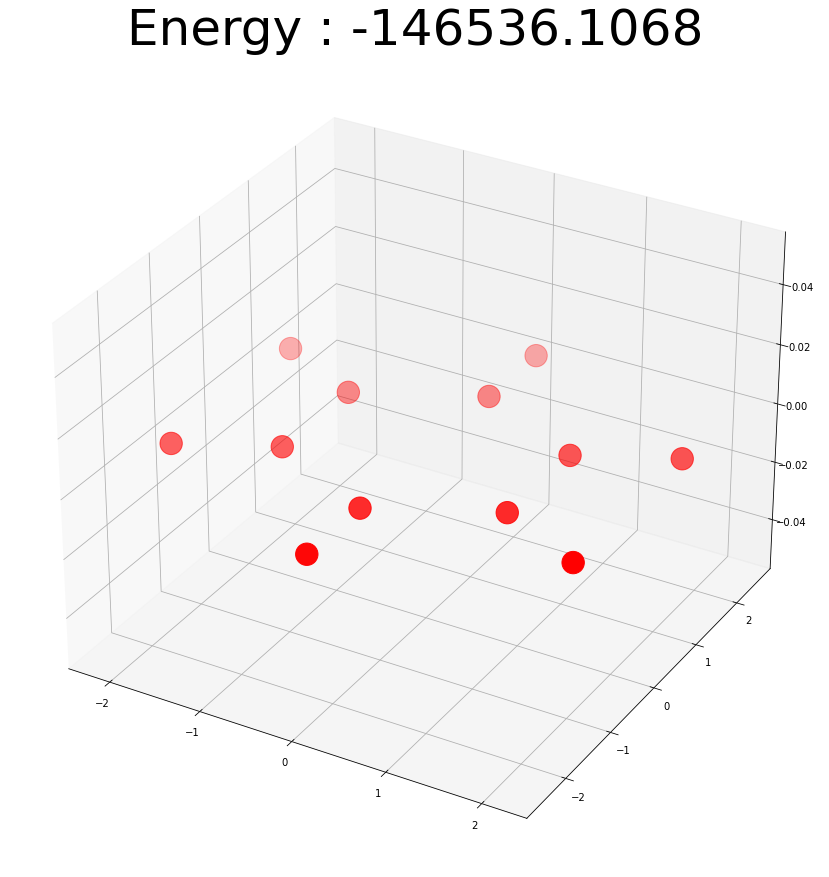

In [7]:
fig = plt.figure(figsize = (15, 15))


for num in range(1):
    ax = fig.add_subplot(1, 1, num + 1, projection = '3d')
    i = configs[num]
    ax.scatter(i[:, 0], i[:, 1], i[:, 2], s = 500, c = 'red')
    ax.set_title("Energy : {}".format(data['E'][num][0]), fontsize = 50)
plt.savefig("images/{}_configurations_paper.png".format(mol))

In [8]:
total_size = int(3e5)
data_points = configs[:total_size]
data_labels = data['E'][:total_size]

## Architecturing the model

In [9]:
optimizer = tf.optimizers.SGD(0.1)
model = keras.Sequential([layers.Flatten(input_shape = (12, 3)), layers.Dense(20, activation = tf.nn.relu), 
                            layers.Dense(10, activation = tf.nn.relu),
                            layers.Dense(1)])
model.build()

In [10]:
assert model(data_points[:10]).shape == data_labels[:10].shape, "Check model architecture"

In [11]:
# model.compile(
#     optimizer=tf.optimizers.Adam(learning_rate=0.001),
#     loss='mean_absolute_error')

In [12]:
train_data, test_data, train_labels, test_labels = train_test_split(data_points, data_labels, test_size = 0.2)

In [13]:
def mean_absolute_error(true, pred):
    return tf.reduce_mean(tf.abs(true - pred))

In [14]:
os.system("mkdir -p logs")
f = open("logs/training.log", "w")

In [15]:
epochs = 5000
small_batch_size = 1000

In [16]:
# f.write("Step\tMAE\tR2\n")
# f.flush()
# print("Step\tMAE\tR2\n")
training_data_size = train_data.shape[0]
print("Step\tAny Training Variable Nan ?")
for step in range(epochs):
    for j in range(0, training_data_size, small_batch_size):
        td = train_data[j:j + small_batch_size]
        tl = train_labels[j:j + small_batch_size]
        with tf.GradientTape() as g:
            batchx = model(td)
            mae = mean_absolute_error(tl, batchx)
        trainable_variables = model.trainable_variables
        gradients = g.gradient(mae, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))
        if j % 600 == 0:
            val = False
            for h in model.trainable_variables:
                val = val or tf.math.is_nan(h).numpy().any()
            print("{}\t{}".format(j, val))
    if step % 10 == 0:
        td = train_data
        tl = train_labels
        pred = model(td)
        mae = mean_absolute_error(tl, pred)
        R2 = r2_score(tl, pred)
#         f.write("{}\t{}\t{}\n".format(step, mae, R2))
        f.flush()
#         print("{}\t{}\t{}\n".format(step, mae, R2))

Step	Any Training Variable Nan ?
0	False
3000	False
6000	False
9000	False
12000	False
15000	False
18000	False
21000	False
24000	False
27000	False
30000	False
33000	False
36000	False
39000	False
42000	False
45000	False
48000	False
51000	False
54000	False
57000	False
60000	False
63000	False
66000	False
69000	False
72000	False
75000	False
78000	False
81000	False
84000	False
87000	False
90000	False
93000	False
96000	False
99000	False
102000	False
105000	False
108000	False
111000	False
114000	False
117000	False
120000	False
123000	False
126000	False
129000	False
132000	False
135000	False
138000	False
141000	False
144000	False
147000	False
150000	False
153000	False
156000	False
159000	False
162000	False
165000	False
168000	False
171000	False
174000	False
177000	False
180000	False
183000	False
186000	False
189000	False
192000	False
195000	False
198000	False
201000	False
204000	False
207000	False
210000	False
213000	False
216000	False
219000	False
222000	False
225000	False
228000	False
231000	

48000	False
51000	False
54000	False
57000	False
60000	False
63000	False
66000	False
69000	False
72000	False
75000	False
78000	False
81000	False
84000	False
87000	False
90000	False
93000	False
96000	False
99000	False
102000	False
105000	False
108000	False
111000	False
114000	False
117000	False
120000	False
123000	False
126000	False
129000	False
132000	False
135000	False
138000	False
141000	False
144000	False
147000	False
150000	False
153000	False
156000	False
159000	False
162000	False
165000	False
168000	False
171000	False
174000	False
177000	False
180000	False
183000	False
186000	False
189000	False
192000	False
195000	False
198000	False
201000	False
204000	False
207000	False
210000	False
213000	False
216000	False
219000	False
222000	False
225000	False
228000	False
231000	False
234000	False
237000	False
0	False
3000	False
6000	False
9000	False
12000	False
15000	False
18000	False
21000	False
24000	False
27000	False
30000	False
33000	False
36000	False
39000	False
42000	False
45000	False
4

KeyboardInterrupt: 

### Saving preprocessed test data

In [26]:
np.save('test_data.npy', test_data)
np.save('test_labels.npy', test_labels)

## Saving the model for testing later

In [19]:
model.save('./EP')

INFO:tensorflow:Assets written to: ./EP/assets


In [ ]:
f.close()